In [30]:
#Importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:
#Reading the file and displaying the data in file
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Retain the 6 features and the target variable
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [4]:
#Displaying the First 10 rows
df.head(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,181.00,181.00,0.00,0.0,0.00,1,0
3,181.00,181.00,0.00,21182.0,0.00,1,0
4,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,4024.36,2671.00,0.00,0.0,0.00,0,0
9,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [5]:
#Printing the info of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [6]:
#Sum of the null Values
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Missing Data
missing_data=df.isnull()
missing_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [9]:
# Removing Duplicates
df.drop_duplicates()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


In [10]:
# Displaying the Rows and Columns
df.shape

(6362620, 7)

In [11]:
# Data Types of columns
df.dtypes

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

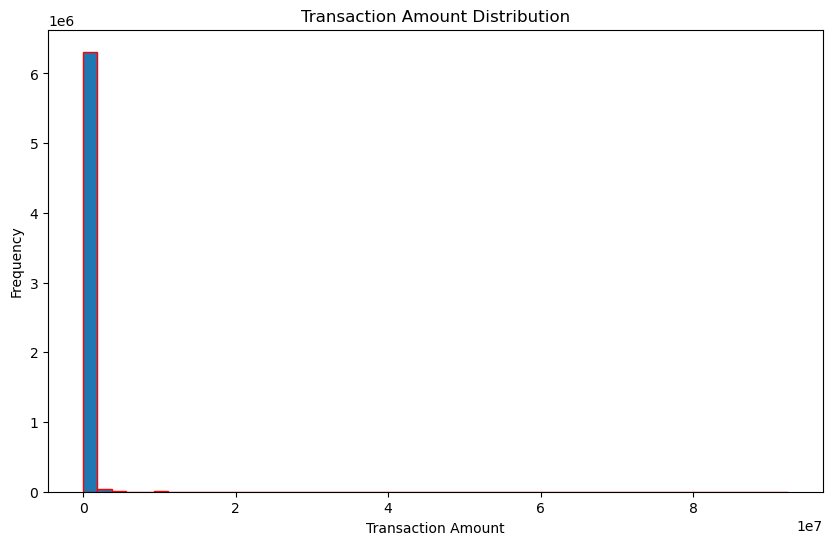

In [12]:
#Histogam for Transaction Amount
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=50, edgecolor='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.show()

In [13]:
#Counting isFraud Values
fraud_counts = df['isFraud'].value_counts()
fraud_counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

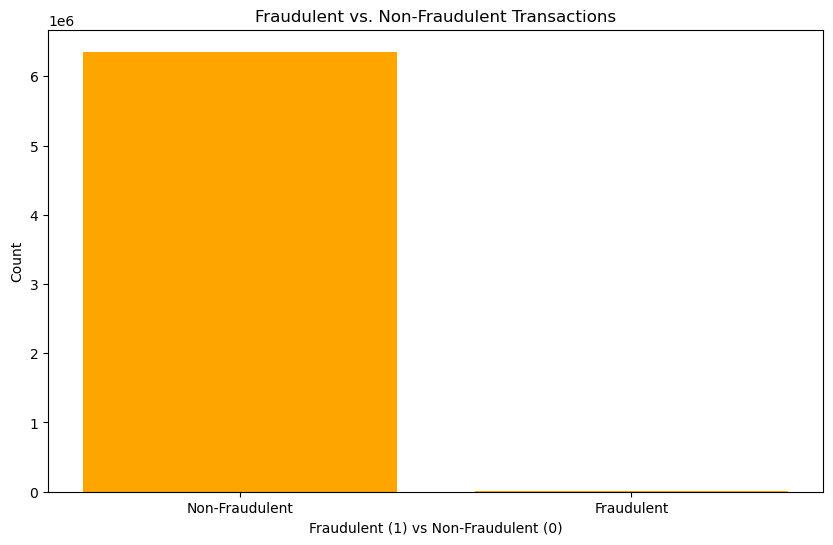

In [14]:
# Bar Graph For Fraudulent vs Non-Fraudulent Transactions Counts
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index, fraud_counts.values, color='Orange')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks(fraud_counts.index, ['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [15]:
#Counting FlaggedFraud Values
Flaggedfraud_counts = df['isFlaggedFraud'].value_counts()
Flaggedfraud_counts

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

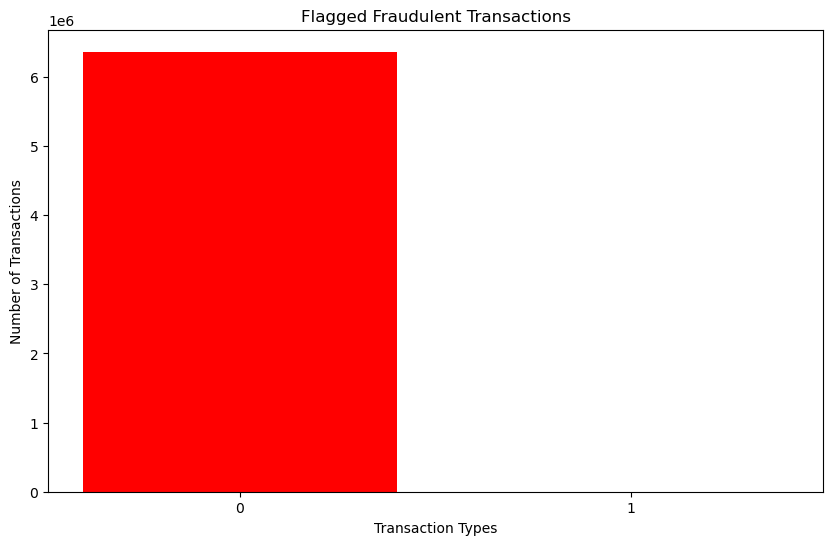

In [16]:
# Bar Graph for Fraudulent vs Non-Fraudulent Amount
plt.figure(figsize=(10, 6))
plt.bar(Flaggedfraud_counts.index, Flaggedfraud_counts.values, color='Red')
plt.title('Flagged Fraudulent Transactions')
plt.xlabel('Transaction Types')
plt.ylabel('Number of Transactions')
plt.xticks(Flaggedfraud_counts.index, ['0', '1'])
plt.show()

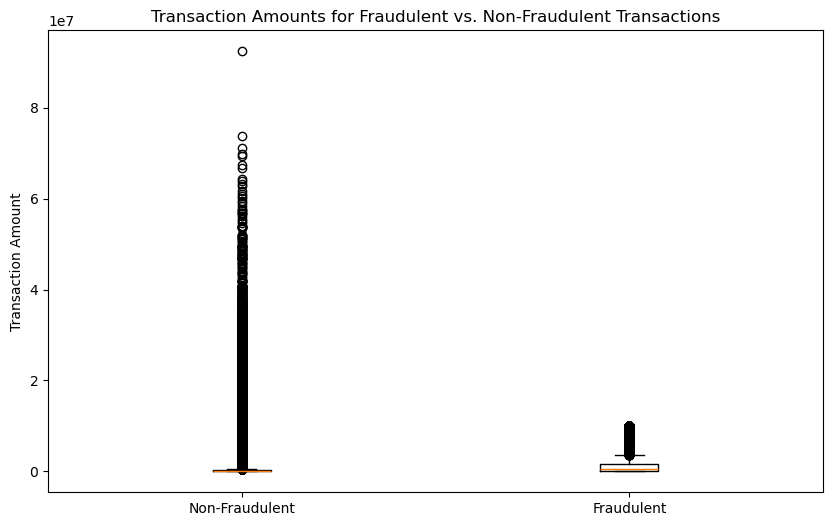

In [17]:
#Box Graph for Fraud Transactions vs Non-Fraud Transactions
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['isFraud'] == 0]['amount'], df[df['isFraud'] == 1]['amount']], labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Transaction Amount')
plt.show()


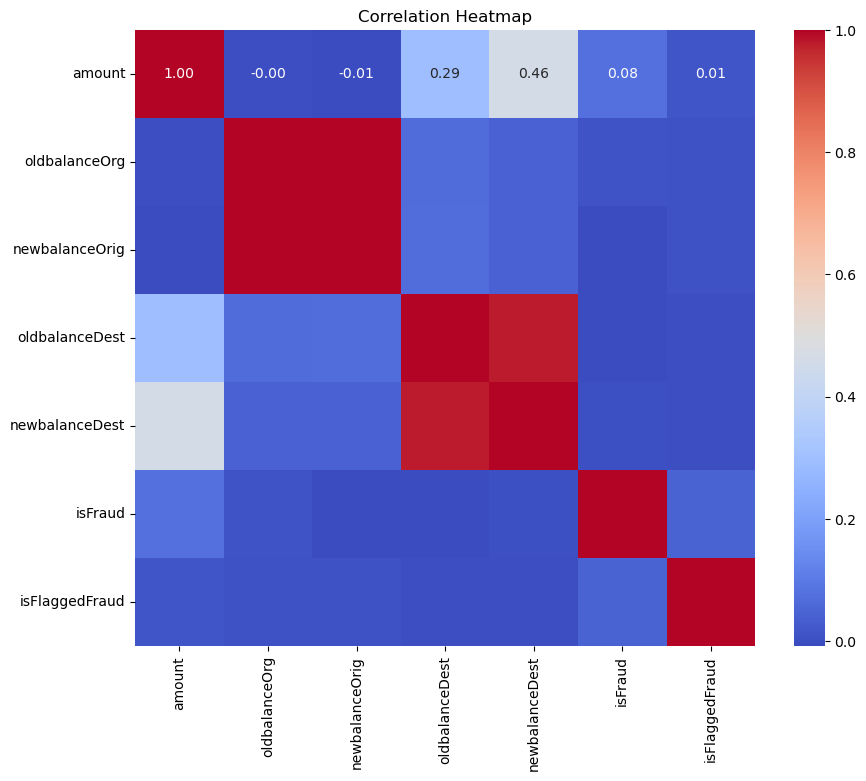

In [18]:
#Heat Map of the dataset
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
x=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y=df[['isFraud']]

In [20]:
#Spliting the dataset for training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#Standardizing the Features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
y_pred=knn.predict(x_test)

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.999387830799262


In [27]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("CONFUSION MATRIX:")
print(conf_matrix)

CONFUSION MATRIX:
[[1270686     218]
 [    561    1059]]


In [28]:
report=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:")
print(report)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.83      0.65      0.73      1620

    accuracy                           1.00   1272524
   macro avg       0.91      0.83      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



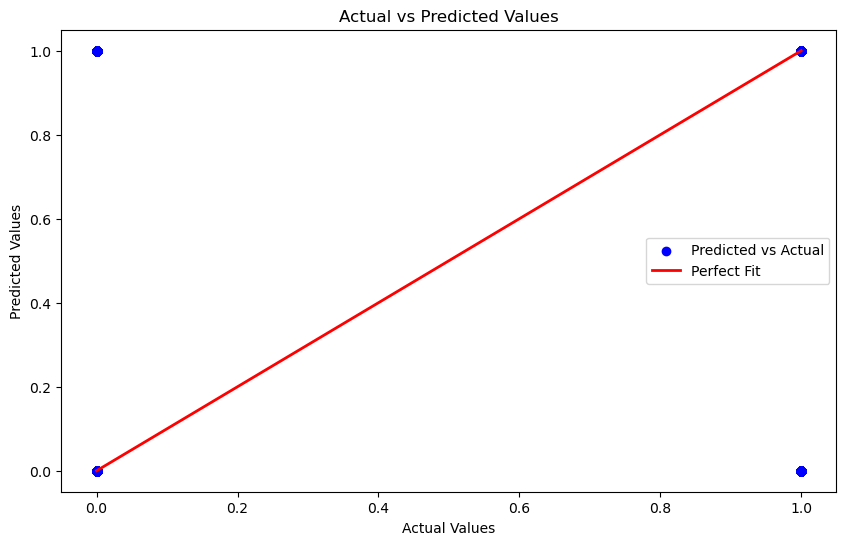

In [29]:
# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
